In [1]:
from spice.spectrum.spectrum_korg import KorgSpectrumEmulator
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np

/Users/mjablons/anaconda3/envs/astro/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Korg interpolator grid

In [2]:
k = KorgSpectrumEmulator()

Using default cache path: ~/.spice_cache
Attempting to download and load model from Hugging Face Hub...
Model downloaded to: /Users/mjablons/.cache/huggingface/hub/models--mjablonska--spice_korg_interpolator/snapshots/5300175a44c55b505c9b93849ca3b935c8d4a734/small_grid.h5
Loading model parameters...
Parameters shape: (1200, 4)
Loading model intensities...
Intensities shape: (1200, 65992)
Loading wavelengths...
Wavelengths shape: (65992,)
Loading continuum intensities...
Continuum intensities shape: (1200, 6599)
Loading continuum wavelengths...
Continuum wavelengths shape: (6599,)
Model loaded successfully


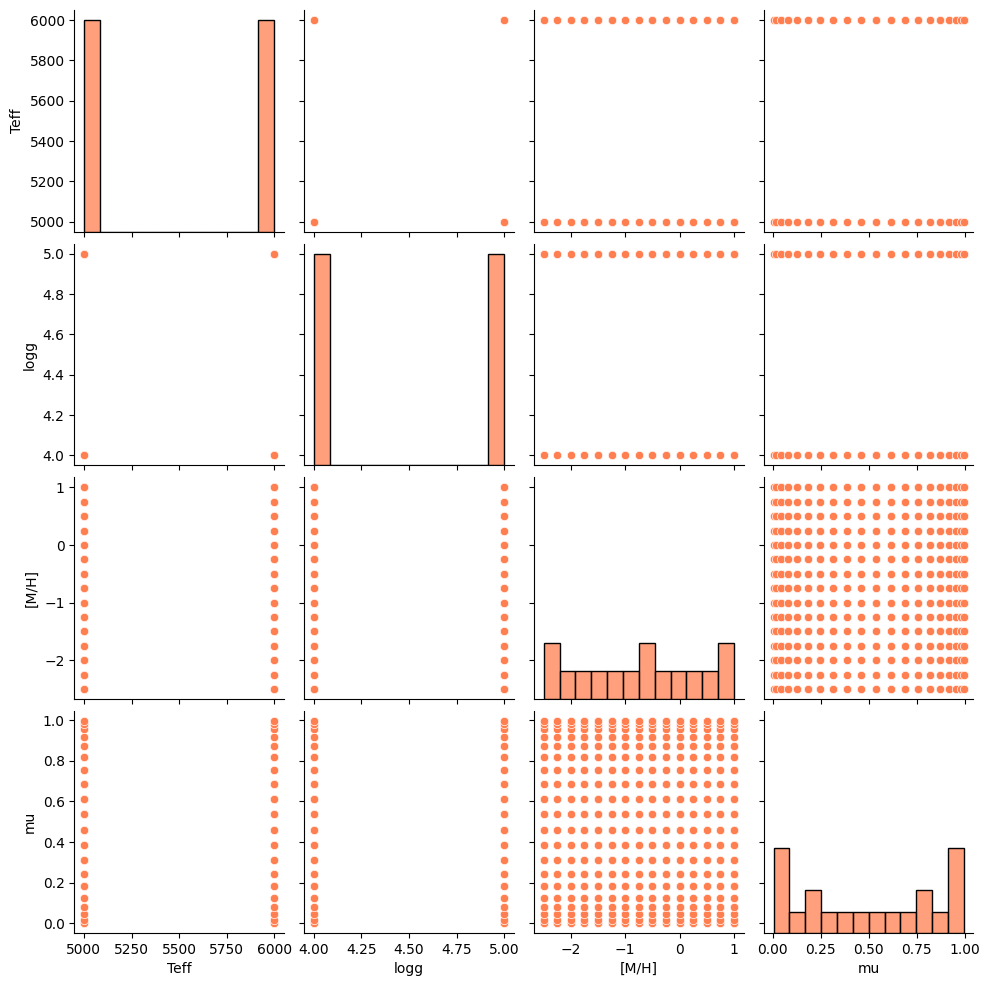

In [3]:
df_params = pd.DataFrame({
    'Teff': k.parameters[:, 0],
    'logg': k.parameters[:, 1],
    '[M/H]': k.parameters[:, 2],
    'mu': k.parameters[:, 3]
})

# Create a 4x4 grid of scatter plots
sns.pairplot(df_params, plot_kws={'color': 'coral'}, diag_kws={'color': 'coral'})
plt.show()

In [4]:
k.parameters

Array([[ 5.0000000e+03,  4.0000000e+00, -1.0000000e+00,  3.4357004e-03],
       [ 5.0000000e+03,  4.0000000e+00, -1.0000000e+00,  1.8014036e-02],
       [ 5.0000000e+03,  4.0000000e+00, -1.0000000e+00,  4.3882787e-02],
       ...,
       [ 6.0000000e+03,  5.0000000e+00,  1.0000000e+00,  9.5611721e-01],
       [ 6.0000000e+03,  5.0000000e+00,  1.0000000e+00,  9.8198599e-01],
       [ 6.0000000e+03,  5.0000000e+00,  1.0000000e+00,  9.9656433e-01]],      dtype=float32)

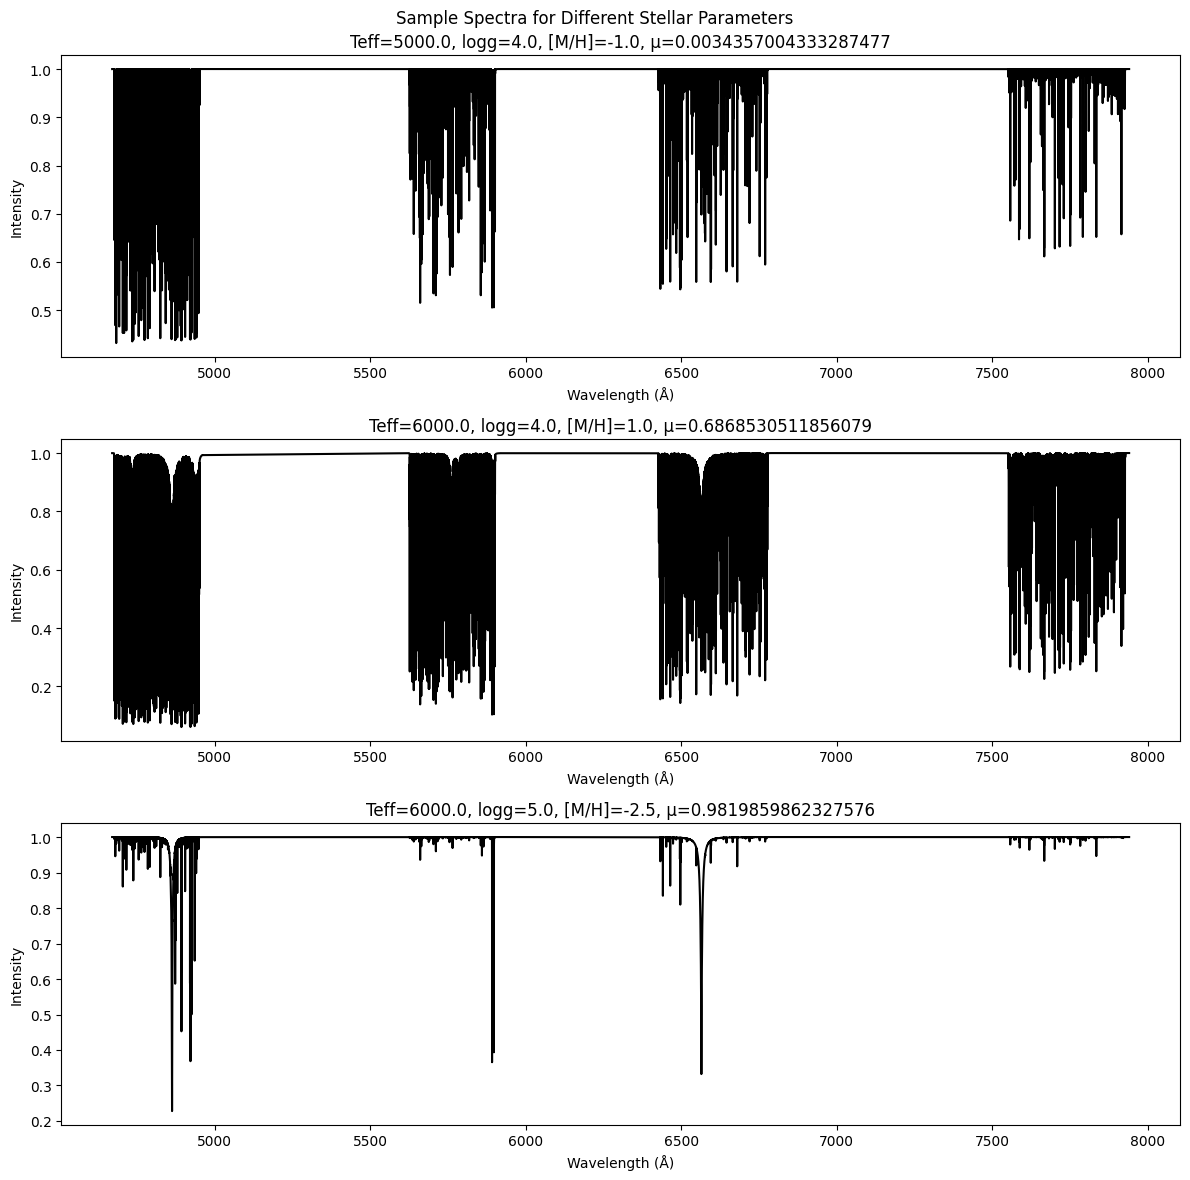

In [5]:
# Select a few parameter sets to plot
sample_param_indices = [ 0, 1172,  558]
wavelengths = 10**k.log10_wavelengths

fig, axes = plt.subplots(3, 1, figsize=(12, 12))
for i, param_index in enumerate(sample_param_indices):
    # Get spectrum for these parameters
    intensities = k.intensities[param_index]
    params = k.parameters[param_index]
    
    # Plot with label showing parameters
    label = f'Teff={params[0]}, logg={params[1]}, [M/H]={params[2]}, μ={params[3]}'
    axes[i].plot(wavelengths, intensities, color='black')
    
    axes[i].set_xlabel('Wavelength (Å)')
    axes[i].set_ylabel('Intensity') 
    axes[i].set_title(label)

plt.suptitle('Sample Spectra for Different Stellar Parameters')
plt.tight_layout()
plt.show()


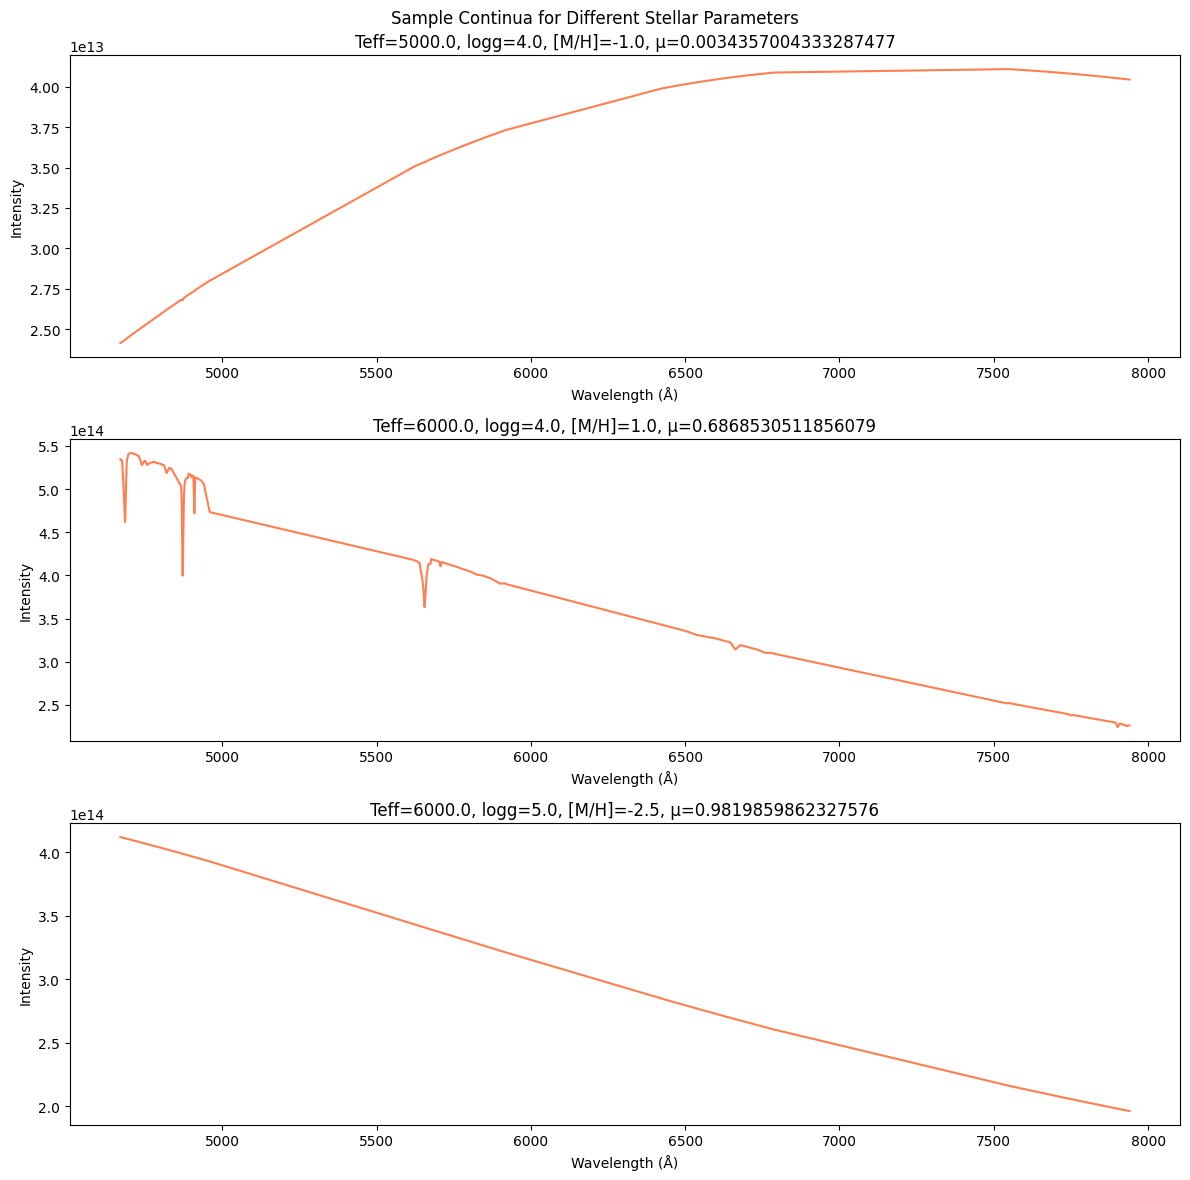

In [6]:
# Select a few parameter sets to plot
sample_param_indices = [ 0, 1172,  558]
wavelengths = 10**k.continuum_wavelengths

fig, axes = plt.subplots(3, 1, figsize=(12, 12))
for i, param_index in enumerate(sample_param_indices):
    # Get spectrum for these parameters
    intensities = k.continuum_intensities[param_index]
    params = k.parameters[param_index]
    
    # Plot with label showing parameters
    label = f'Teff={params[0]}, logg={params[1]}, [M/H]={params[2]}, μ={params[3]}'
    axes[i].plot(wavelengths, intensities, color='coral')
    
    axes[i].set_xlabel('Wavelength (Å)')
    axes[i].set_ylabel('Intensity') 
    axes[i].set_title(label)

plt.suptitle('Sample Continua for Different Stellar Parameters')
plt.tight_layout()
plt.show()